In [2]:
# clean version of creating a multi-layer visualization
import pandas as pd
from pymnet import *

https://github.com/bolozna/Multilayer-networks-library/
http://mkivela.com/pymnet/networktypes.html#multilayer-networks
follow the tutorial above

In [3]:
# Specify the path to the CSV file
file_path = 'toy.csv'

# Use pandas to read the CSV file
toy = pd.read_csv(file_path)

In [4]:
mnet = MultilayerNetwork(aspects=1)
# 5 layers are: governing, committee, nominator, nominee, laureate
mnet.add_layer('Governing')
mnet.add_layer('Committee')
mnet.add_layer('Nominator')
mnet.add_layer('Nominee')
mnet.add_layer('Laureate')

In [5]:
# Get unique nodes from 'qid_from' and 'qid_to' columns
unique_nodes_qid_from = set(toy['qid_from'])
unique_nodes_qid_to = set(toy['qid_to'])

# Combine unique nodes from both columns and convert them to a list
unique_nodes = list(unique_nodes_qid_from.union(unique_nodes_qid_to))

In [6]:
# Loop over unique_nodes and add each node to the graph
for node_name in unique_nodes:
    mnet.add_node(node_name)

In [7]:
for index, row in toy.iterrows():
    qid_from = row['qid_from']
    role_from = row['role_from']
    qid_to = row['qid_to']
    role_to = row['role_to']
    
    mnet[qid_from, qid_to, role_from, role_to] = 1

In [139]:
fig.savefig("net.pdf")

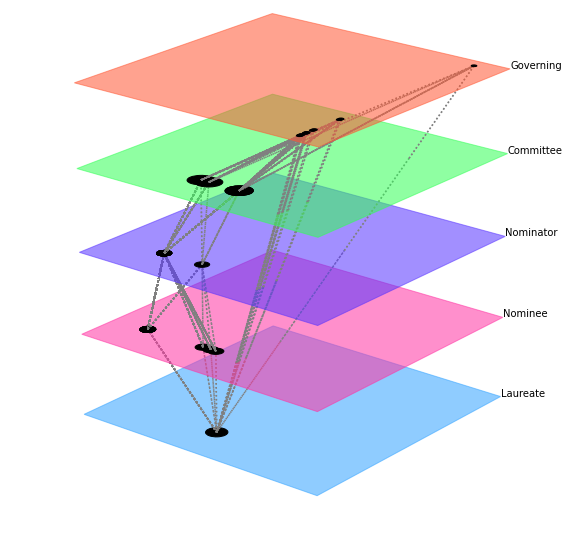

In [8]:
## another better visualization
fig=draw(mnet, show=True,
         layout="spectral",
         layergap=0.6,
         figsize=(10, 10),
         layershape="rectangle",
         layerOrderDict={'Governing': 0, 'Committee': 1, 'Nominator': 2, 'Nominee': 3, 'Laureate': 4},
         # layerLabelRule={"rule": "layer", "name": ['Governing', 'Committee', 'Nominator', 'Nominee', 'Laureate']}, 
         defaultLayerAlpha=0.55,
         nodeLabelRule={},
         layerColorDict={'Governing': '#FF5733', 'Committee': '#33FF57', 'Nominator': '#5733FF', 'Nominee': '#FF33A3', 'Laureate': '#33A3FF'},
         defaultLayerColor="gray",
         layerColorRule={"rule": "layercolor", },
         #edgeColorRule={"rule":"edgeweight","colormap":"magma","scaleby":0.1},
         nodeSizeRule={"rule":"degree","propscale":0.02})


In [152]:
fig.savefig("net2.pdf")